In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('co2.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df=df.drop(["Make","Model"],axis=1)

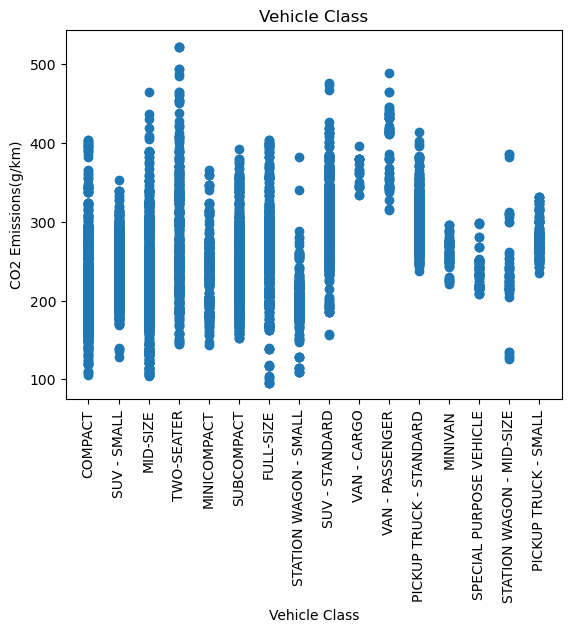

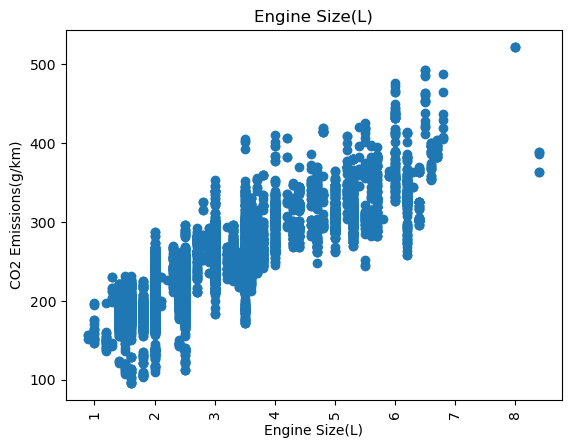

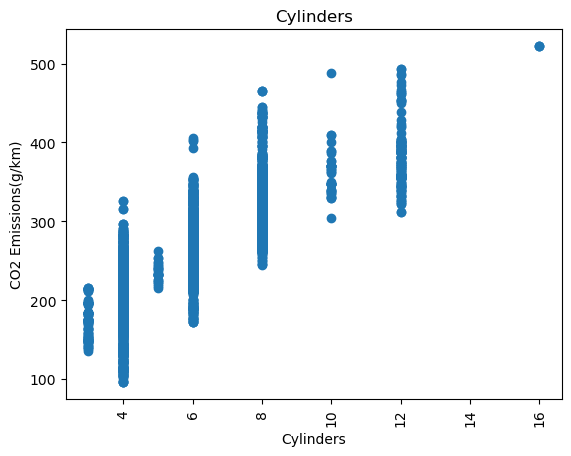

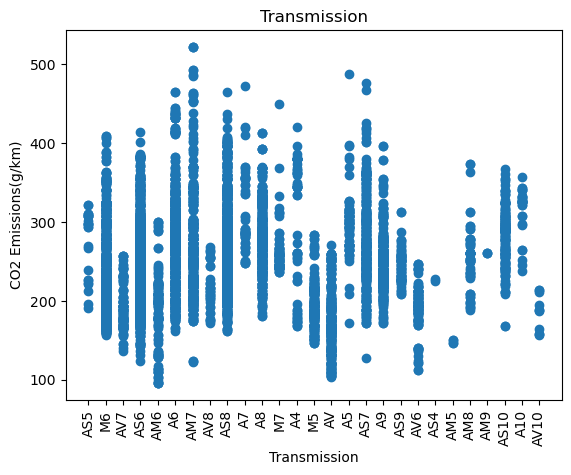

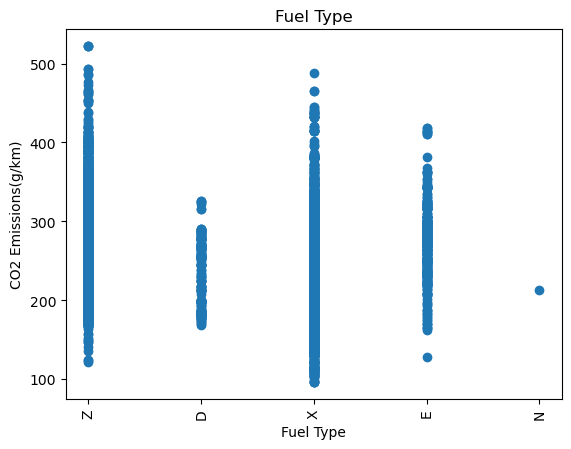

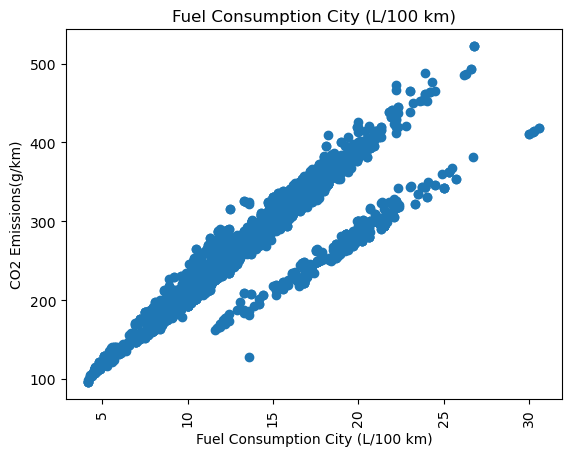

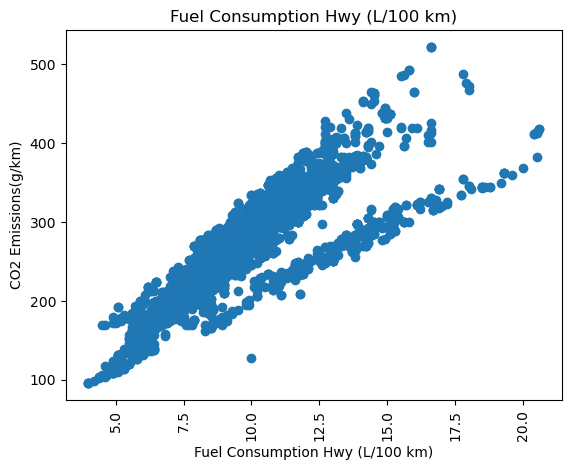

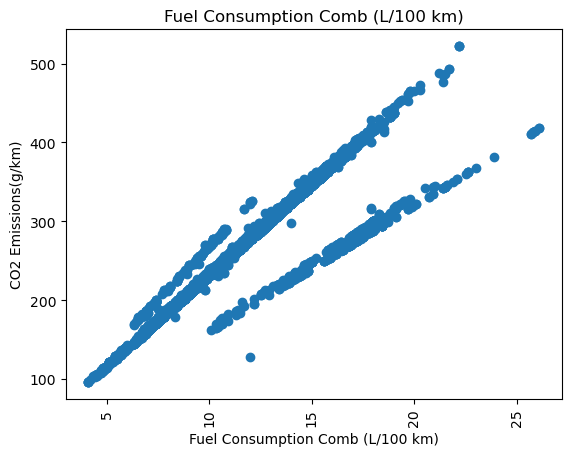

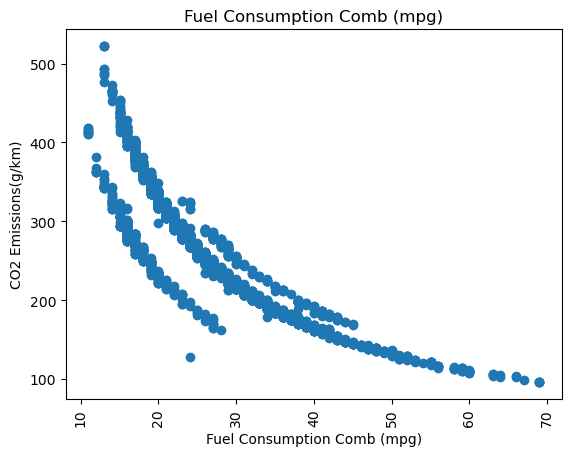

In [4]:
for label in df.columns[0:9]:
    plt.scatter(df[label],df["CO2 Emissions(g/km)"])
    plt.title(label)
    plt.ylabel("CO2 Emissions(g/km)")
    plt.xticks(rotation=90)
    plt.xlabel(label)
    plt.show()

In [5]:
n_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = n_df.corr()

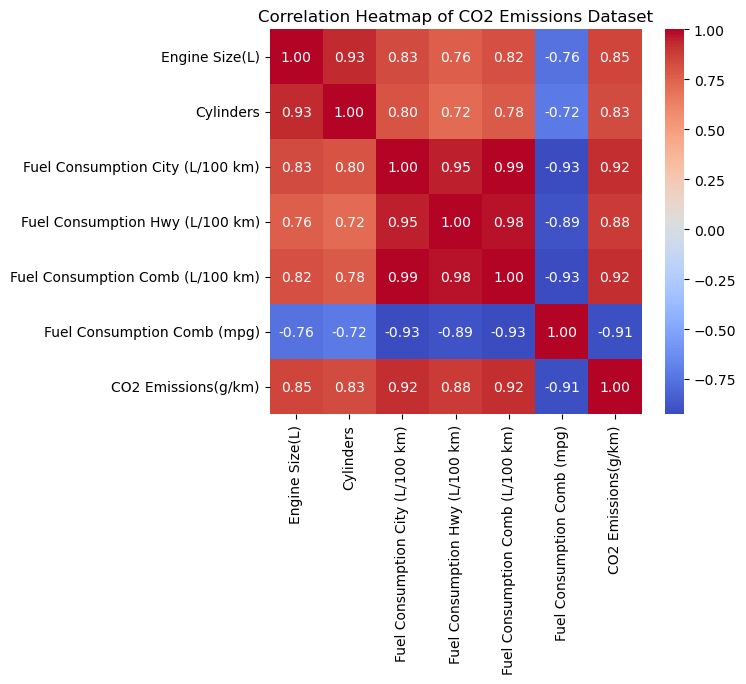

In [6]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of CO2 Emissions Dataset")
plt.show()

In [7]:
df=df.drop(["Vehicle Class","Transmission","Fuel Type","Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)"],axis=1)

In [8]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,8.5,33,196
1,2.4,4,9.6,29,221
2,1.5,4,5.9,48,136
3,3.5,6,11.1,25,255
4,3.5,6,10.6,27,244


In [94]:
class multiplelr:
    def __init__(self,lr,epochs):
        self.m=None
        self.b=None
        self.lr=lr
        self.epochs=epochs
    def fit(self,x_train,y_train):
        #calculating b
        s,t=x_train.shape
        self.m=np.ones(t)
        self.b=0
        for i in range(self.epochs):
            #updating  b
            y_pred=np.dot(x_train,self.m)+self.b
            
            slope=-2*(np.mean(y_train-y_pred))
            self.b=self.b-(self.lr*slope)
            #updating m
            m_def=-2*(np.dot((y_train-y_pred),x_train)/x_train.shape[0])
            self.m=self.m-(self.lr*m_def)
        print(self.m,self.b)

    def predict(self,x_test):
         y_pred=np.dot(x_test,self.m)+self.b
         return y_pred
    def score(self,x_test,y_test):
        y_pred = self.predict(x_test)
         
        num=np.sum((y_test-y_pred)*(y_test-y_pred)) 
        den=np.sum((y_test-y_test.mean())*(y_test-y_test.mean())) 
        score = 1 - (num / den)
        return score
      

In [96]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4].values

In [98]:
x_train=train.iloc[:,0:4].values
y_train=train.iloc[:,4].values
x_test=test.iloc[:,0:4].values
y_test=test.iloc[:,4].values

In [100]:
def min_max(data):
    min=np.min(data)
    max=np.max(data)
    scaled_data=(data-min) /(max-min)
    return scaled_data

In [102]:
def z2(data):
    mean=np.mean(data)
    dev=np.std(data)
    scaled_data=(data-mean)/dev
    return scaled_data

In [104]:
x_train_scaled = z2(x_train)
y_train_scaled = z2(y_train)
x_test_scaled=z2(x_test)
y_test_scaled=z2(y_test)

In [106]:
lr=multiplelr(0.01,1000)

In [108]:
lr.fit(x_train_scaled,y_train_scaled)

[ 0.35207263  0.85631674  2.02515371 -0.28443572] 1.3887084300077237


In [109]:
lr.predict(x_test_scaled)

array([-0.65792769, -0.59097865, -0.48470005, ..., -0.97872826,
        1.55384896, -0.17708545])

In [112]:
lr.score(x_test_scaled,y_test_scaled)

0.8956265757415359